# Working with SEG-Y headers

Headers in SEG-Y data are additional meta information asscoiated with each trace. In SEG-Y these are not pooled in a common data block but interleaved with the seismic trace data so we need to do some work to extract it. **segysak** has two helper methods for extracting information from a SEGY file. These are `segy_header_scan` and `segy_header_scrape`. Both of these functions return `pandas.DataFrame` objects containing header or header related information which can be used QC, analysis and plotting.

## Scanning the headers

`segy_header_scan` is primarily designed to help quickly asscertain the byte locations of key header information for loading or converting the full SEG-Y file. It does this by just looking at the first *N* traces (1000 by default) and returns the byte location and statistics related to the file.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from segysak.segy import segy_header_scan
# default just needs the file name
scan = segy_header_scan('../data/volve10r12-full-twt-sub3d.sgy')
scan

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
TRACE_SEQUENCE_FILE,5,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
FieldRecord,9,1000.0,10091.98,1.407687,10090.0,10091.00,10092.0,10093.00,10094.0
TraceNumber,13,1000.0,100.54,57.831072,1.0,50.75,100.5,150.25,202.0
EnergySourcePoint,17,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0


If you want to see the full DataFrame in a notebook, use the `pandas` options context manager.


In [3]:
import pandas as pd
with pd.option_context('display.max_rows', 89):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
FieldRecord,9,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
TraceNumber,13,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
EnergySourcePoint,17,1000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
CDP,21,1000.0,2.249540e+03,57.831072,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
CDP_TRACE,25,1000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
TraceIdentificationCode,29,1000.0,1.000000e+00,0.000000,1.0,1.000000e+00,1.0,1.000000e+00,1.0
NSummedTraces,31,1000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0
NStackedTraces,33,1000.0,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000e+00,0.0


Often lots of header fields don't get filled, so lets filter by the standard deviation column `std`. Infact, there are so few here we don't need the context manager. As you can see, for `segy_loader` or `segy_converter` we will need to tell those functions that the byte location for **iline** and **xline** are *189* and *193* respectively, and the byte locations for **cdpx** and **cdpy** are either *73* and *77* or *181* and *185* which are identical pairs.

In [4]:
# NIIIICCCEEEE...
scan[scan['std'] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
TRACE_SEQUENCE_FILE,5,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
FieldRecord,9,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0
TraceNumber,13,1000.0,1.005400e+02,57.831072,1.0,5.075000e+01,100.5,1.502500e+02,202.0
CDP,21,1000.0,2.249540e+03,57.831072,2150.0,2.199750e+03,2249.5,2.299250e+03,2351.0
SourceX,73,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
SourceY,77,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
CDP_X,181,1000.0,4.351992e+07,70152.496037,43396267.0,4.345933e+07,43519976.5,4.358062e+07,43641261.0
CDP_Y,185,1000.0,6.477772e+08,17532.885301,647744704.0,6.477622e+08,647777222.0,6.477923e+08,647809133.0
INLINE_3D,189,1000.0,1.009198e+04,1.407687,10090.0,1.009100e+04,10092.0,1.009300e+04,10094.0


## Scraping Headers

Scraping the header works like a scan but instead of statistics we get a DataFrame of actual trace header values. You can reduce the size of the scan by using the *partial_scan* keyword if required. The index of the DataFrame is the trace index and the columns are the header fields.

In [5]:
from segysak.segy import segy_header_scrape
scrape = segy_header_scrape('../data/volve10r12-full-twt-sub3d.sgy', partial_scan=10000)
scrape

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,10090,10090,1,0,2150,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10090,10090,2,0,2151,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,10090,10090,3,0,2152,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,10090,10090,4,0,2153,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10090,10090,5,0,2154,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,98,10139,10139,98,0,2247,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,99,10139,10139,99,0,2248,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,100,10139,10139,100,0,2249,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,101,10139,10139,101,0,2250,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We know from the scan that many of these fields were empty so lets go ahead and filter our *scrape* by using the standard deviation again and passing the index which is the same as our column names.

In [6]:
scrape = scrape[scan[scan['std'] > 0].index]
scrape

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,CDP,SourceX,SourceY,CDP_X,CDP_Y,INLINE_3D,CROSSLINE_3D
0,1,10090,10090,1,2150,43640052,647744704,43640052,647744704,10090,2150
1,2,10090,10090,2,2151,43638839,647745006,43638839,647745006,10090,2151
2,3,10090,10090,3,2152,43637626,647745309,43637626,647745309,10090,2152
3,4,10090,10090,4,2153,43636413,647745611,43636413,647745611,10090,2153
4,5,10090,10090,5,2154,43635200,647745914,43635200,647745914,10090,2154
...,...,...,...,...,...,...,...,...,...,...,...
9995,98,10139,10139,98,2247,43537224,647833471,43537224,647833471,10139,2247
9996,99,10139,10139,99,2248,43536011,647833773,43536011,647833773,10139,2248
9997,100,10139,10139,100,2249,43534798,647834076,43534798,647834076,10139,2249
9998,101,10139,10139,101,2250,43533585,647834378,43533585,647834378,10139,2250


And our example wouldn't be complete without some plots. Pandas has some great plots for quickly scanning your data but we can augment these with **seaborn** a nice plotting library.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

ModuleNotFoundError: No module named 'seaborn'

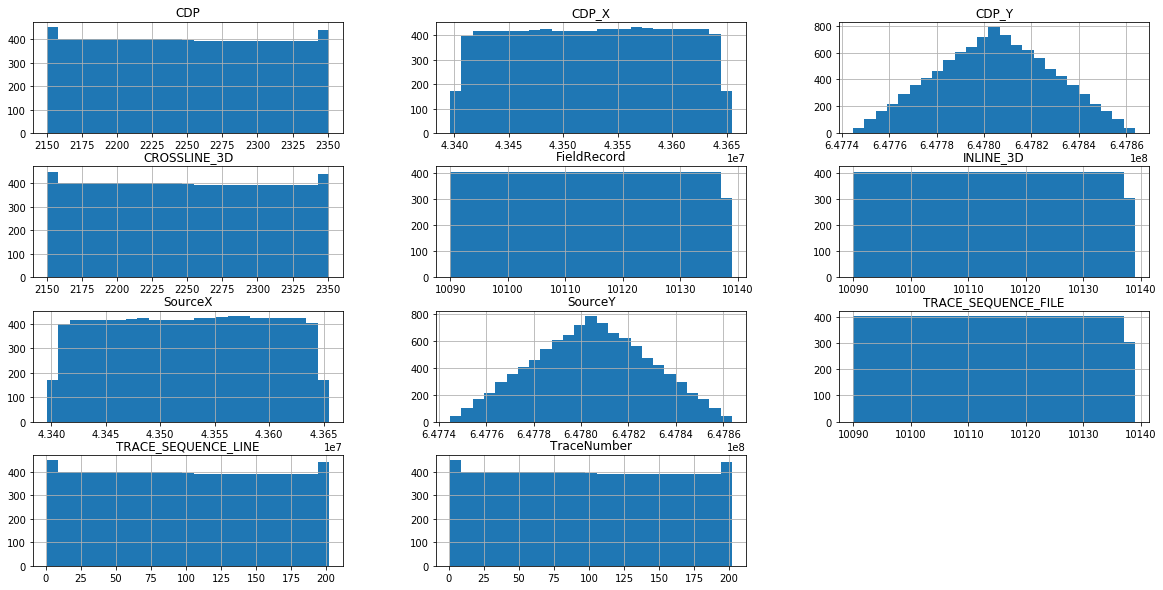

In [8]:
plot = scrape.hist(bins=25, figsize=(20, 10))

We can also just plot up the geometry to check that everything looks ok, here the line numbering and coordinates seem to match up, great!

AttributeError: 'PathCollection' object has no property 'palette'

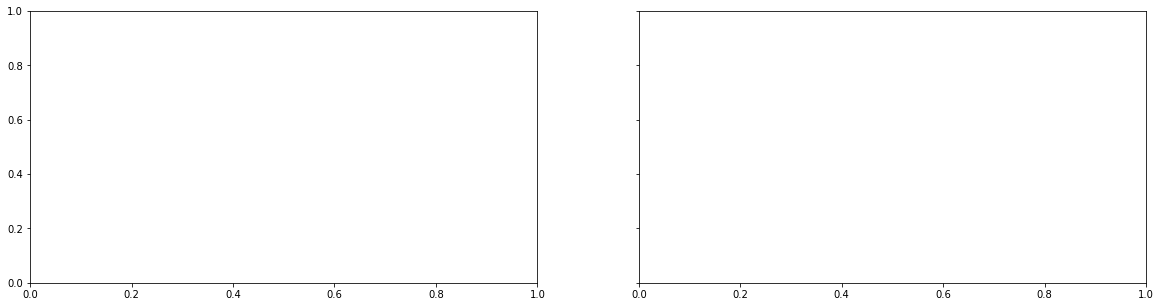

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 5), sharex=True, sharey=True)

scrape.plot(kind='scatter', x='CDP_X', y='CDP_Y', c='INLINE_3D', ax=axs[0], palette='gist_ncar')
axs[0].set_aspect('equal', 'box')
sns.lineplot(data=scrape, x='CDP_X', y='CDP_Y', hue='CROSSLINE_3D', ax=axs[1], palette='gist_ncar')
axs[1].set_aspect('equal', 'box')